<a href="https://colab.research.google.com/github/AY1895/Data-Analysis-in-Healthcare/blob/main/Data_Analysis_in_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=733fc2e19e67974846520cbbdf21eb5f97cbb22bdbe3ce33472ca41366fb3819
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [11]:
# Load the data
# Replace the path with your actual file location
final_df = pd.read_excel('/content/final.xlsx')  # Update this path

In [12]:
# Inspect the data
print("First few rows:")
print(final_df.head())
print("\nData structure:")
print(final_df.info())
print("\nSummary statistics:")
print(final_df.describe())

First few rows:
        LA_name    LA_code  TotalDeath  TotalAge  Totalageperthousand  \
0          Adur  E07000223          87     61182                 1.42   
1     Allerdale  E07000026         259     96422                 2.69   
2  Amber Valley  E07000032         306    122309                 2.50   
3          Arun  E07000224         320    149518                 2.14   
4      Ashfield  E07000170         378    119497                 3.16   

   Age0to14  Age0to14perthousand  Age15TO19  Age15TO19perthousand  Age20to24  \
0      9820               160.50       3540                 57.86       2982   
1     15097               156.57       5790                 60.05       4610   
2     19993               163.46       7305                 59.73       6233   
3     21770               145.60       7931                 53.04       7443   
4     21257               177.89       7345                 61.47       7064   

   ...  TotalReligion  TotalReligionperthousand  CBHJMSReligion 

In [13]:
# Check for missing values
print("\nMissing values:")
print(final_df.isna().sum())


Missing values:
LA_name                             0
LA_code                             0
TotalDeath                          0
TotalAge                            0
Totalageperthousand                 0
Age0to14                            0
Age0to14perthousand                 0
Age15TO19                           0
Age15TO19perthousand                0
Age20to24                           0
Age20to24perthousand                0
Age25to59                           0
Age25to59perthousand                0
Age60to90andOVER                    0
Age60to90andOVERperthousand         0
TotalHealth                         0
TotalHealthperthousand              0
GoodHealth                          0
GoodHealthperthousand               0
Fairhealth                          0
Fairhealthperthousand               0
BadHealth                           0
BadHealthperthousand                0
TotalMaritalStatus                  0
TotalMaritalStatusperthousand       0
SingleMaritalStatus              

In [14]:
# Visualization settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

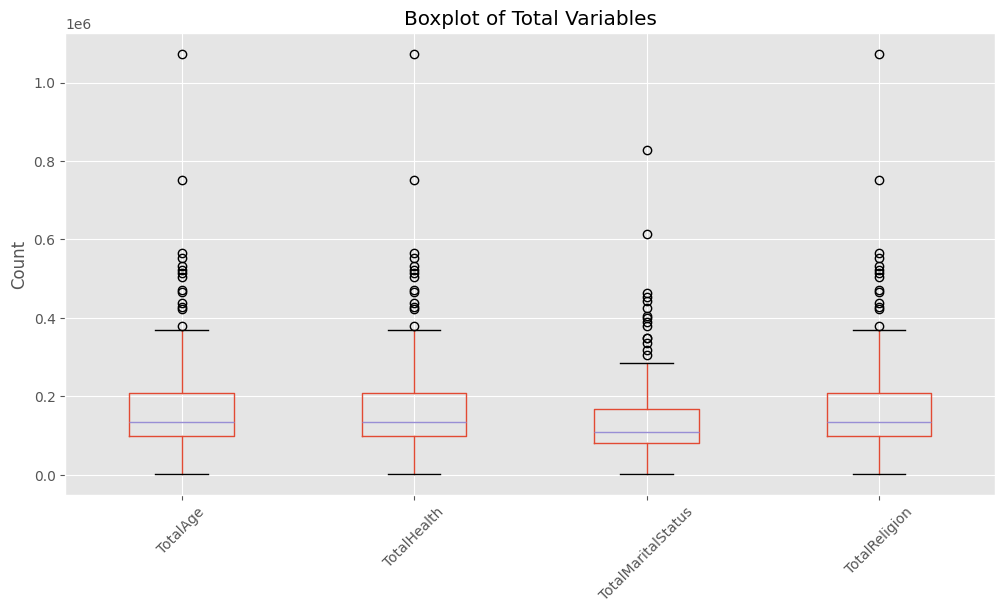

In [15]:
# Boxplots
# First set of boxplots
plt.figure(figsize=(12, 6))
final_df[['TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion']].boxplot()
plt.title('Boxplot of Total Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

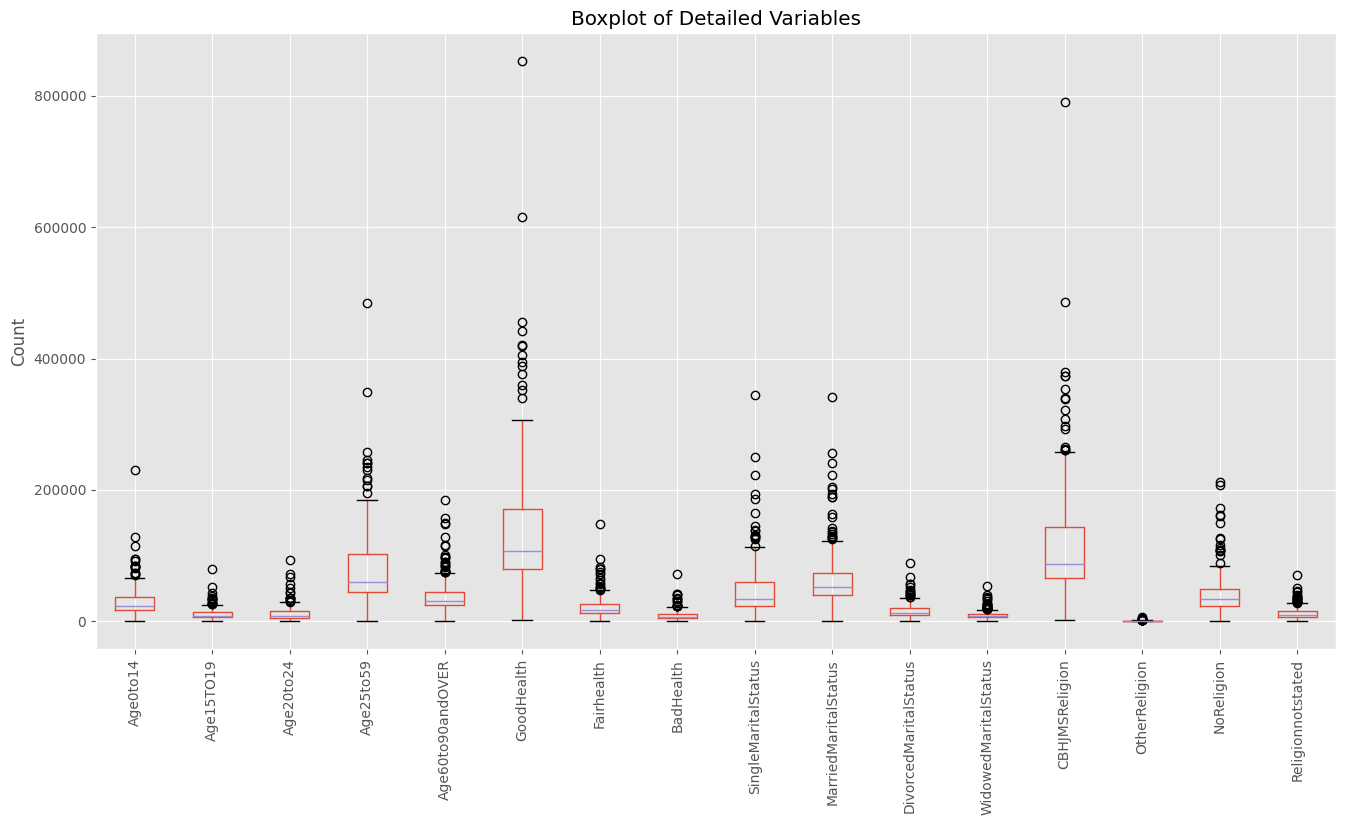

In [17]:
# Second set of boxplots
plt.figure(figsize=(16, 8))
cols_to_plot = ['Age0to14', 'Age15TO19', 'Age20to24', 'Age25to59', 'Age60to90andOVER',
                'GoodHealth', 'Fairhealth', 'BadHealth', 'SingleMaritalStatus',
                'MarriedMaritalStatus', 'DivorcedMaritalStatus', 'WidowedMaritalStatus',
                'CBHJMSReligion', 'OtherReligion', 'NoReligion', 'Religionnotstated']
final_df[cols_to_plot].boxplot()
plt.title('Boxplot of Detailed Variables')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

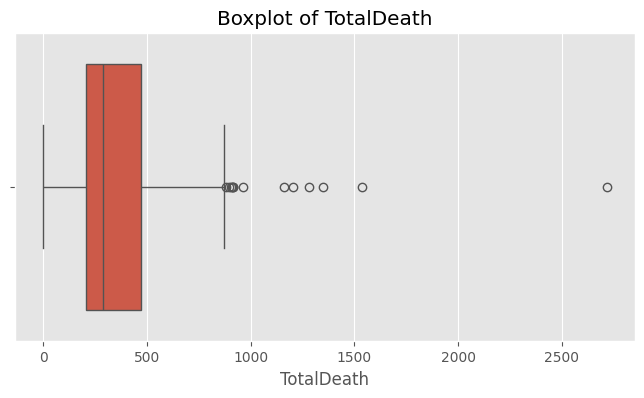

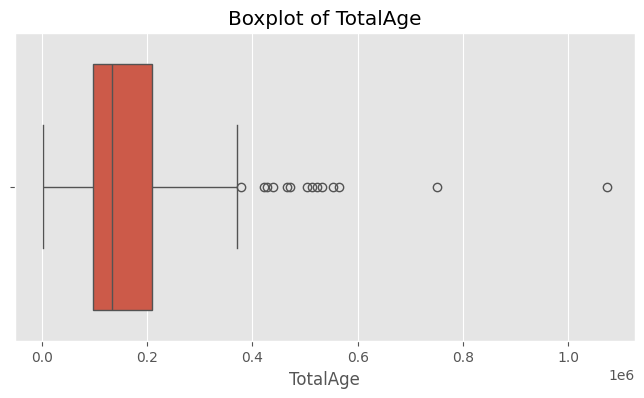

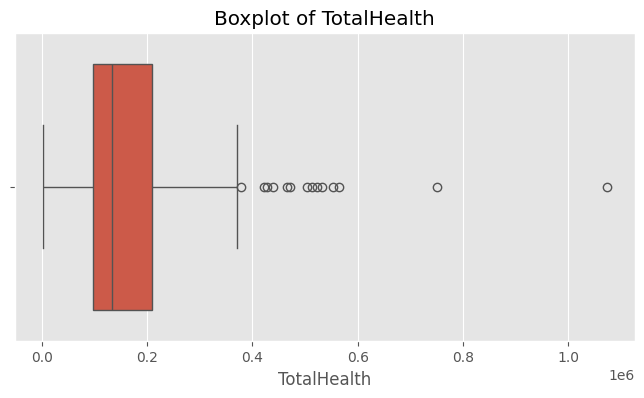

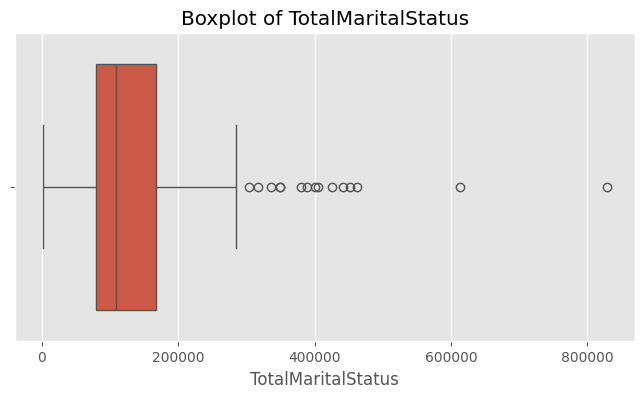

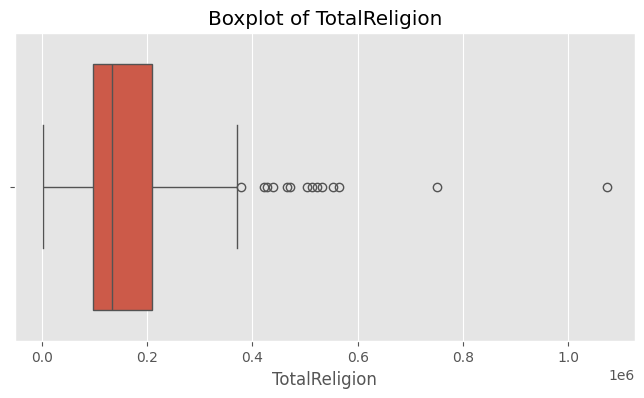

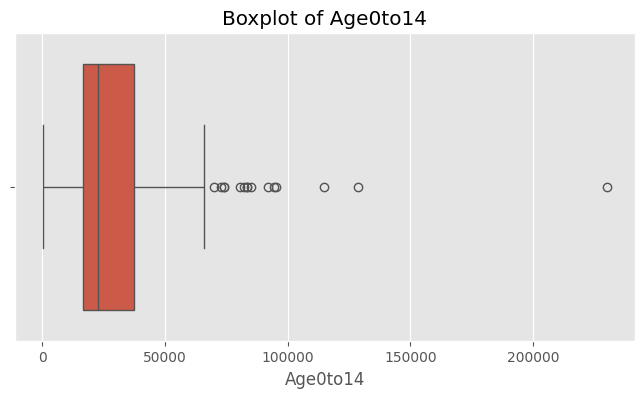

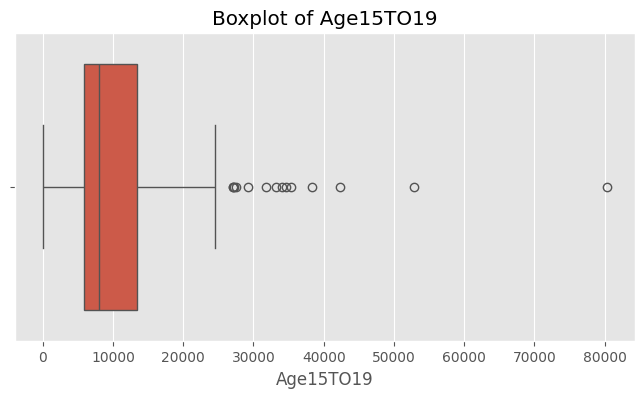

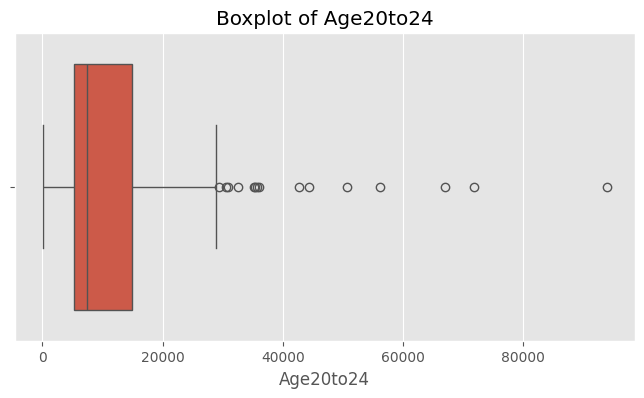

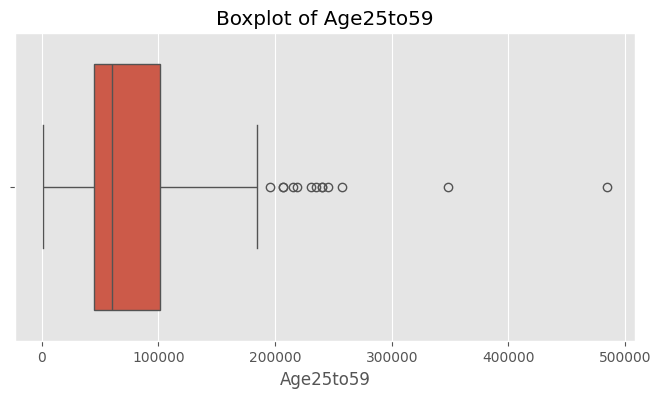

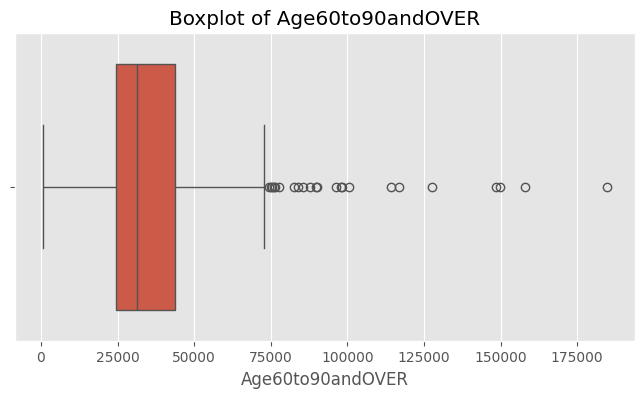

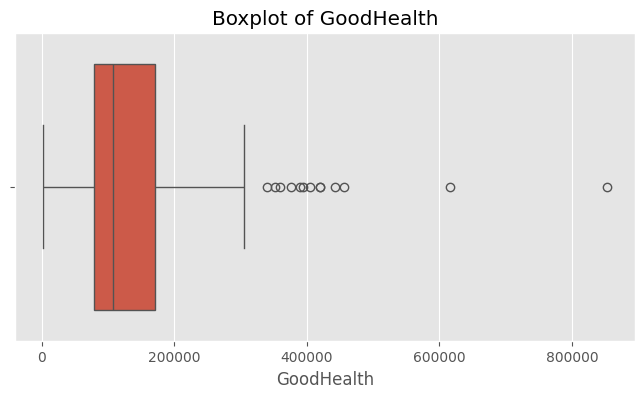

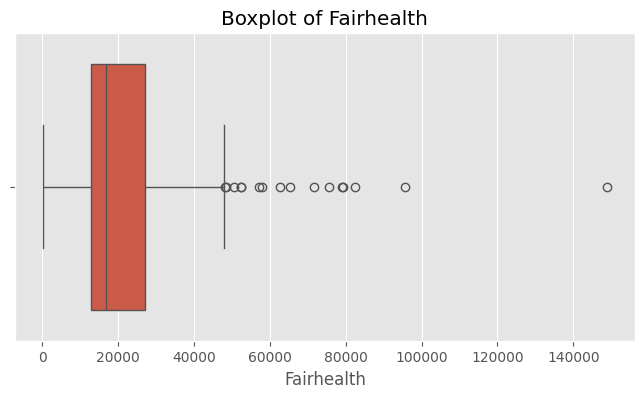

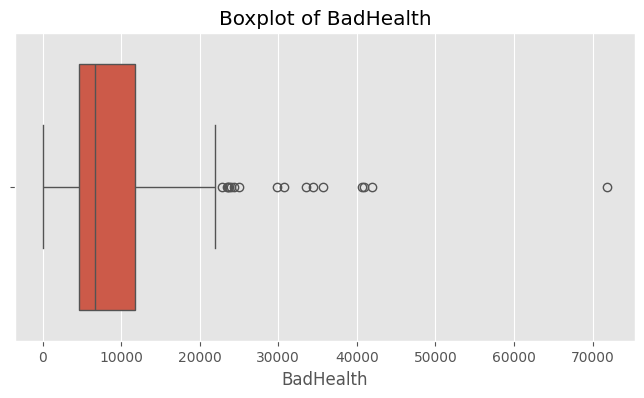

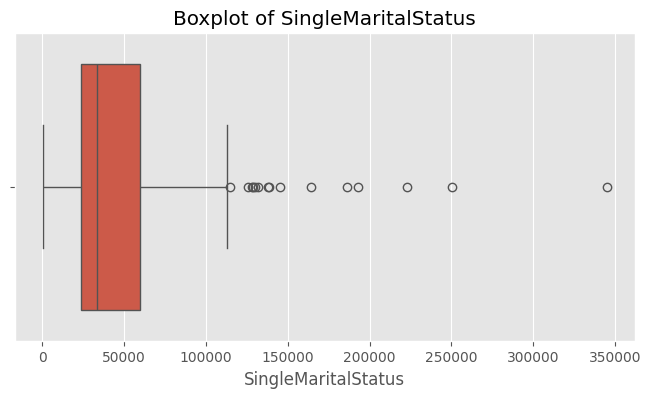

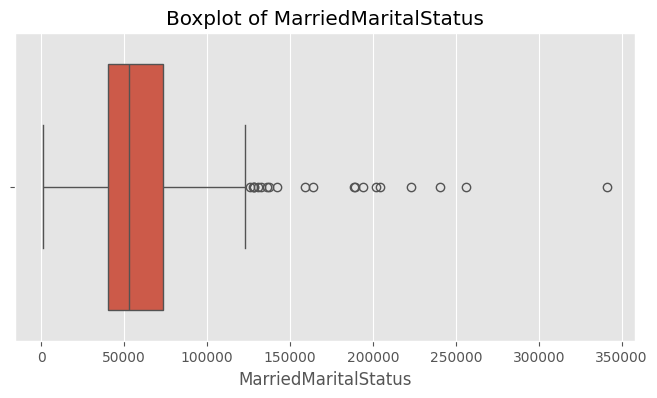

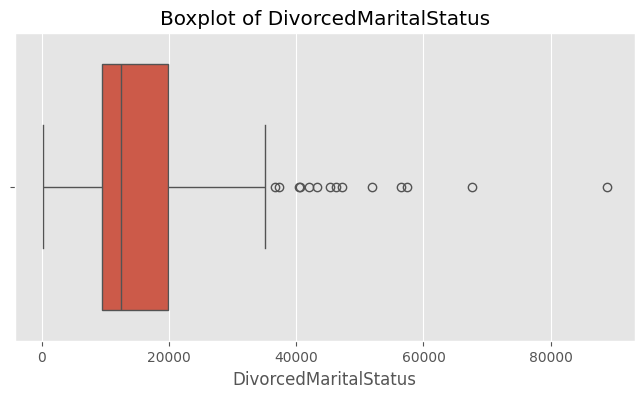

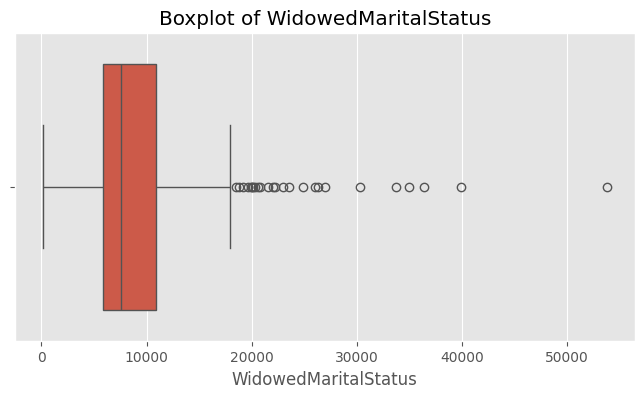

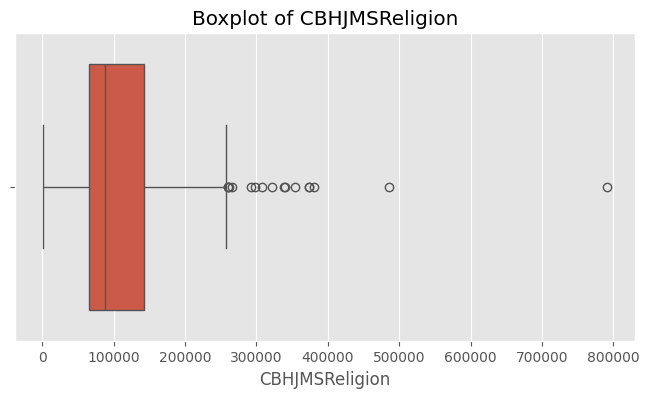

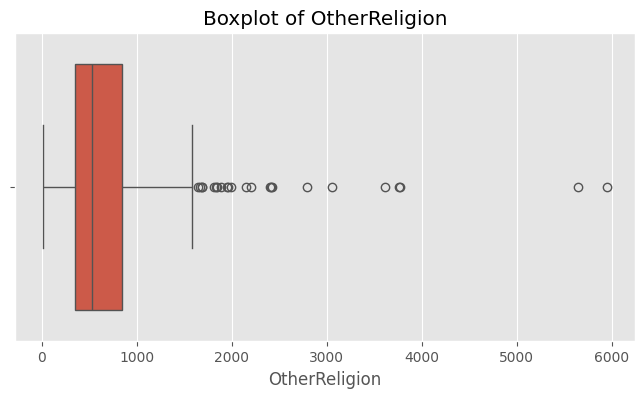

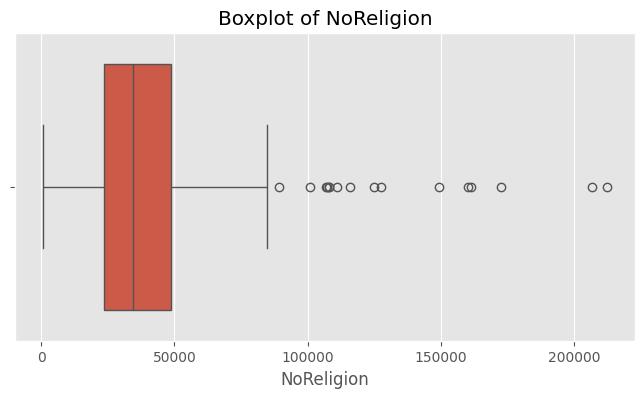

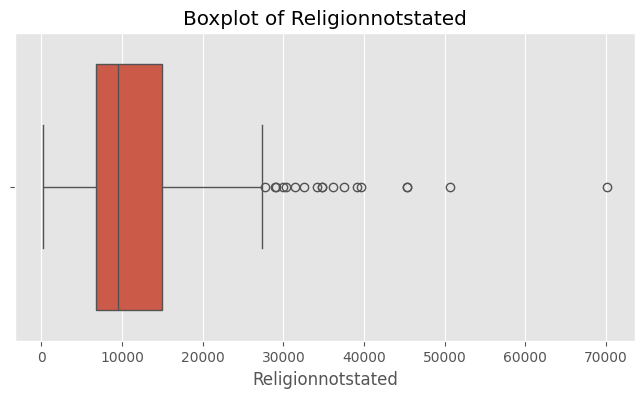

In [19]:
# Individual boxplots
variables = ['TotalDeath', 'TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion',
             'Age0to14', 'Age15TO19', 'Age20to24', 'Age25to59', 'Age60to90andOVER',
             'GoodHealth', 'Fairhealth', 'BadHealth', 'SingleMaritalStatus',
             'MarriedMaritalStatus', 'DivorcedMaritalStatus', 'WidowedMaritalStatus',
             'CBHJMSReligion', 'OtherReligion', 'NoReligion', 'Religionnotstated']

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

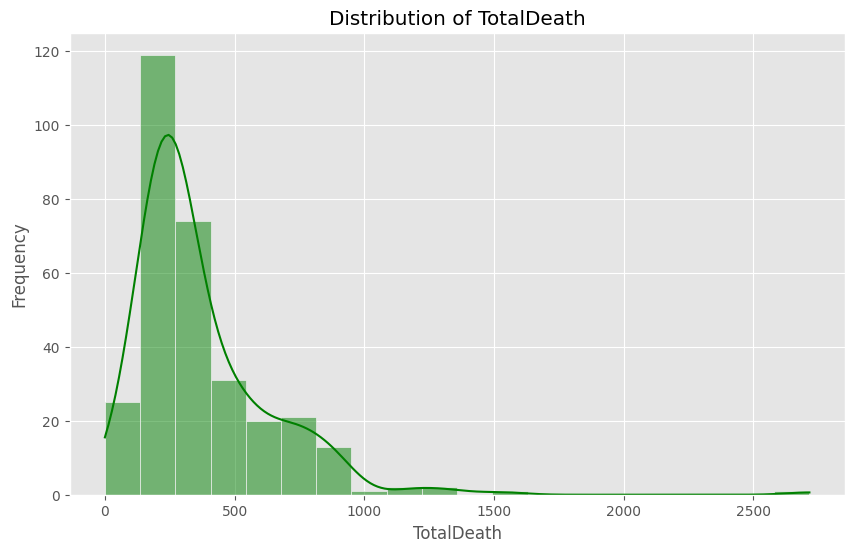

In [20]:
# Histograms
# TotalDeath histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_df['TotalDeath'], bins=20, color='green', kde=True)
plt.title('Distribution of TotalDeath')
plt.xlabel('TotalDeath')
plt.ylabel('Frequency')
plt.show()

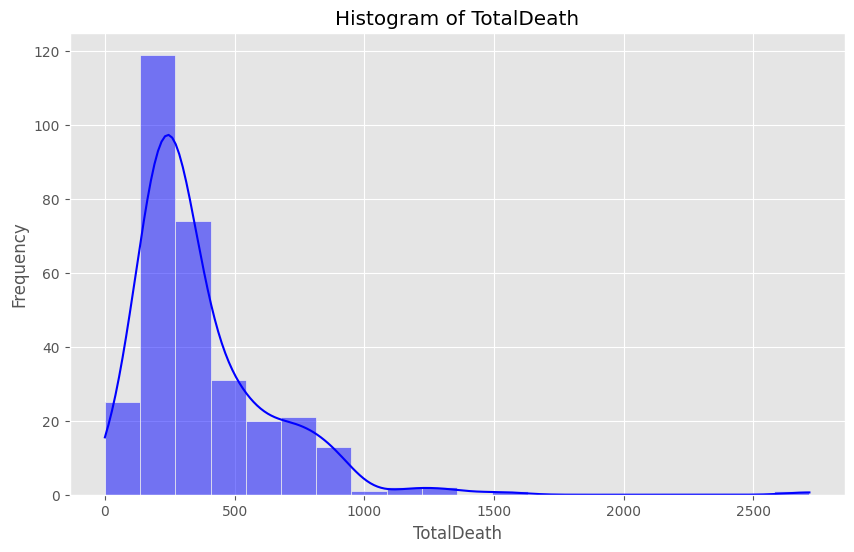

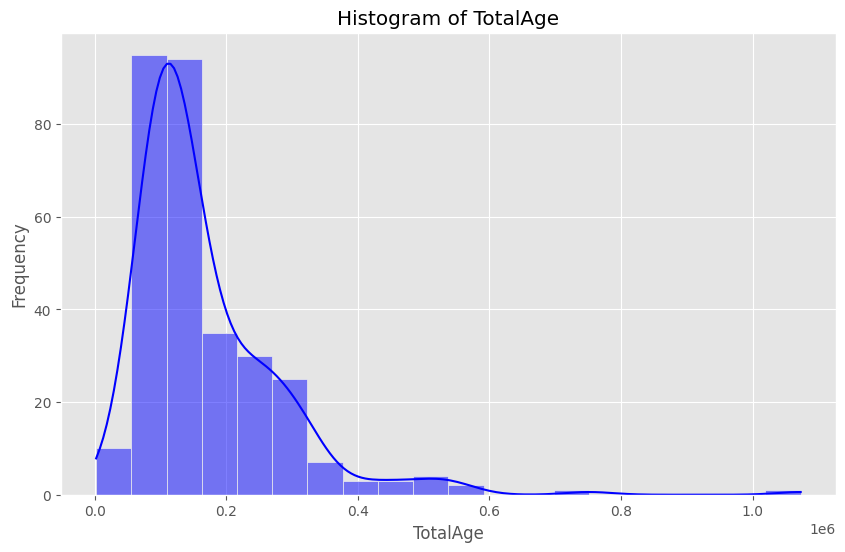

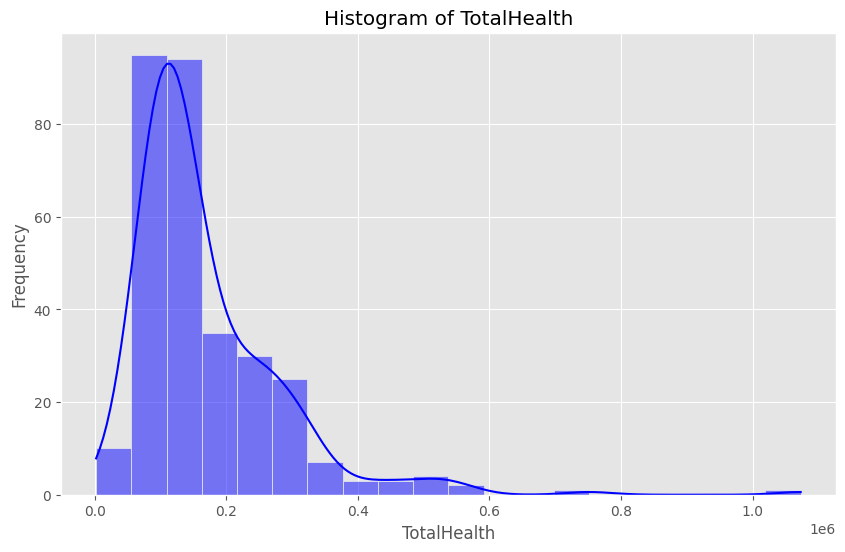

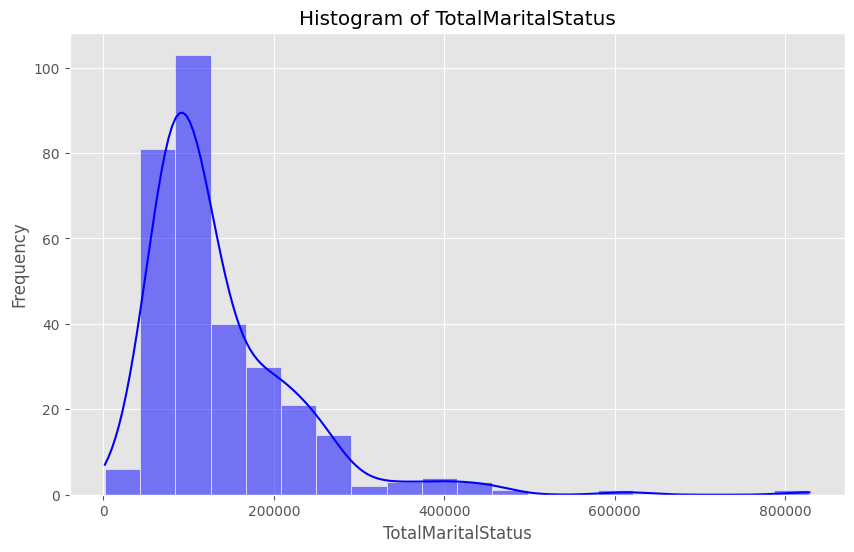

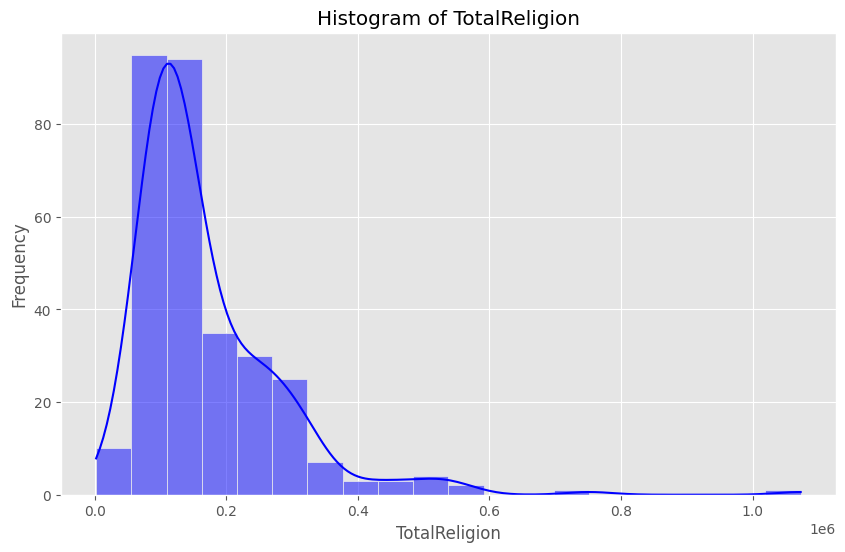

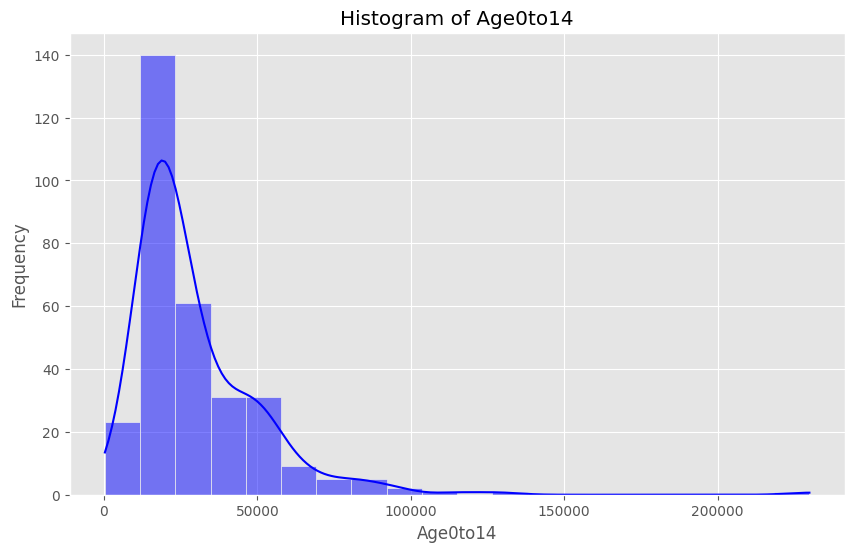

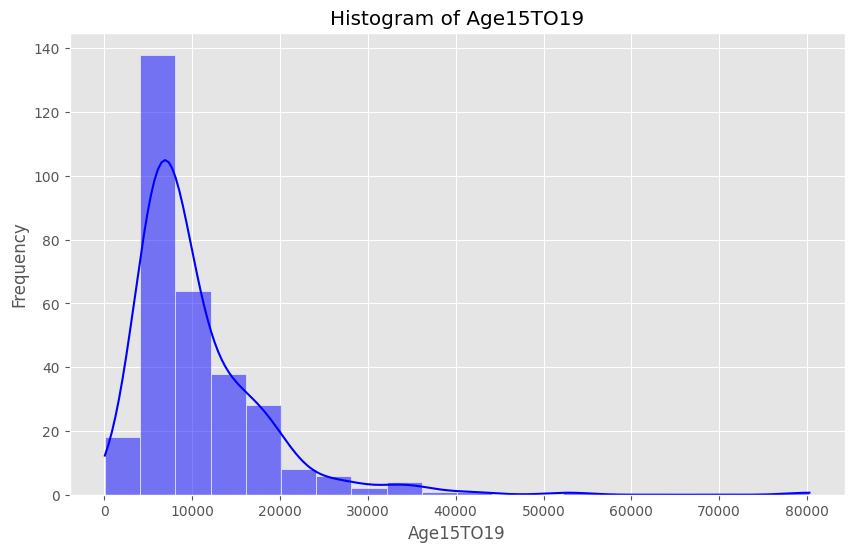

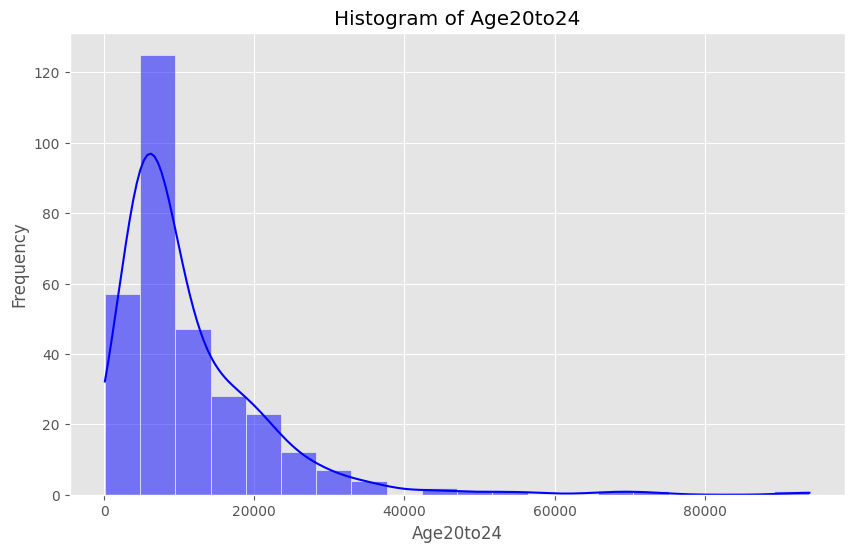

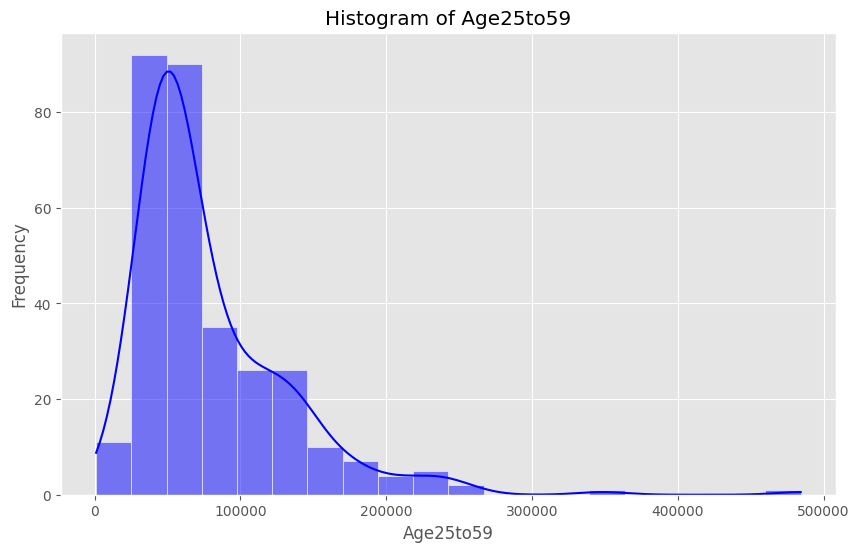

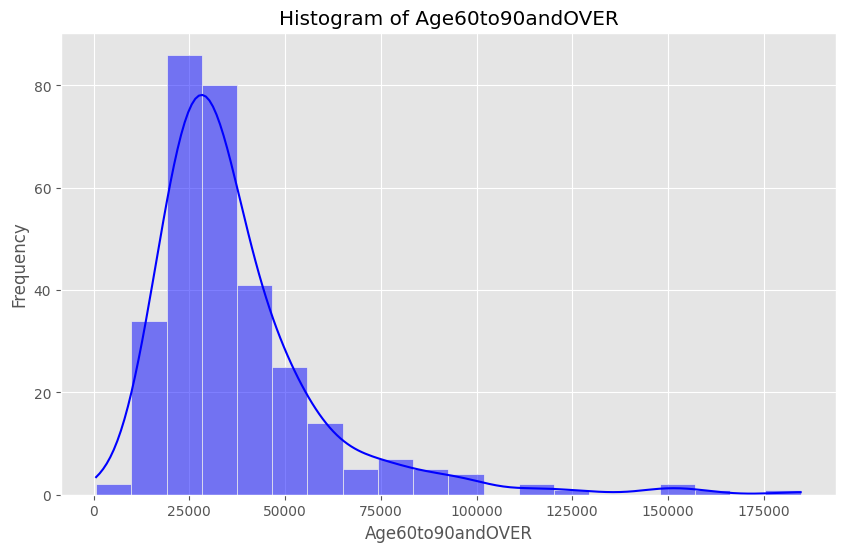

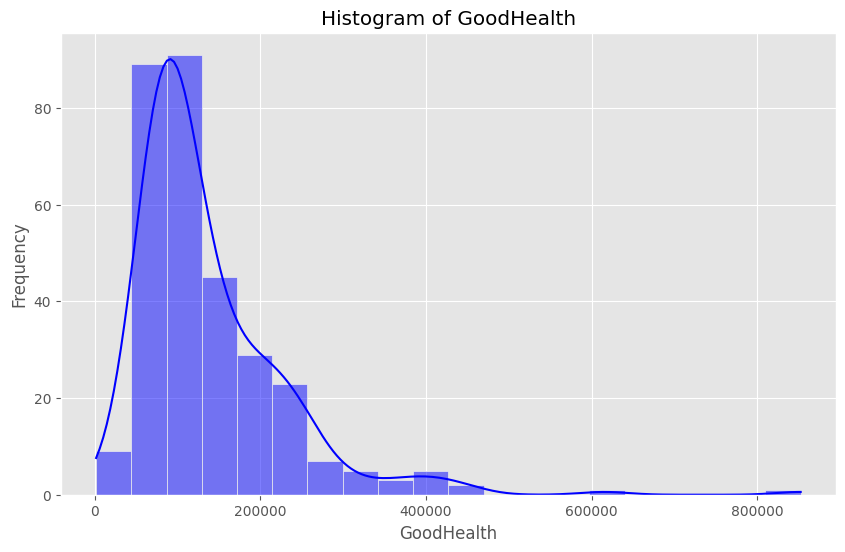

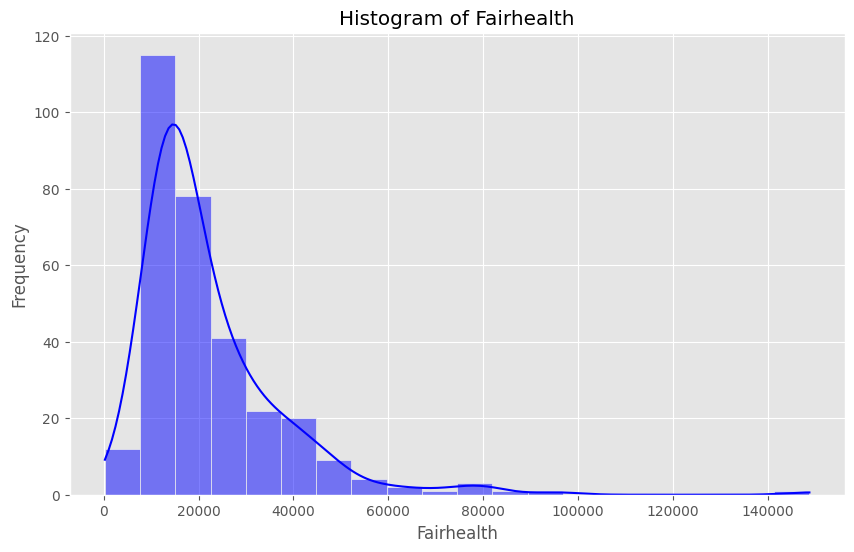

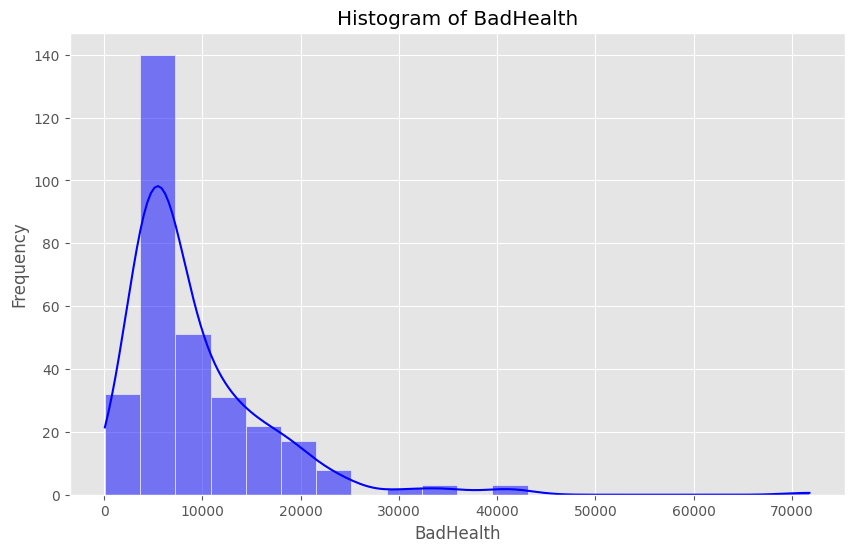

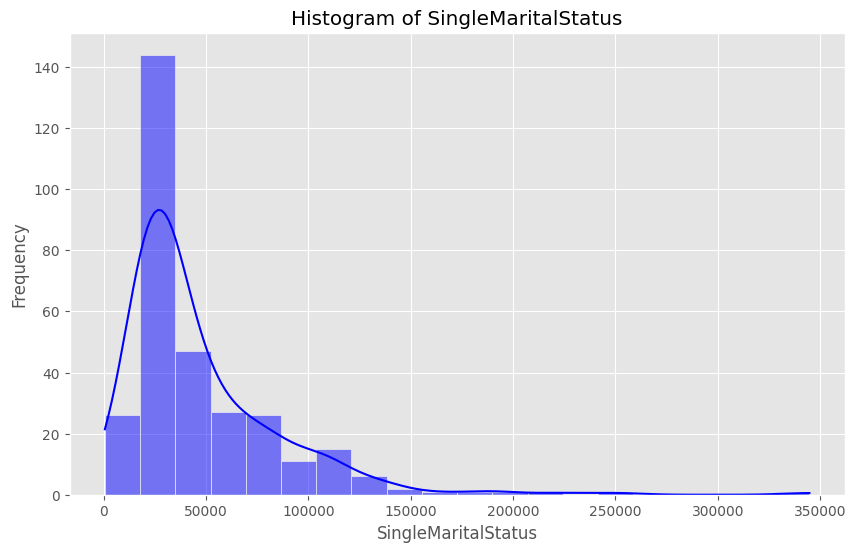

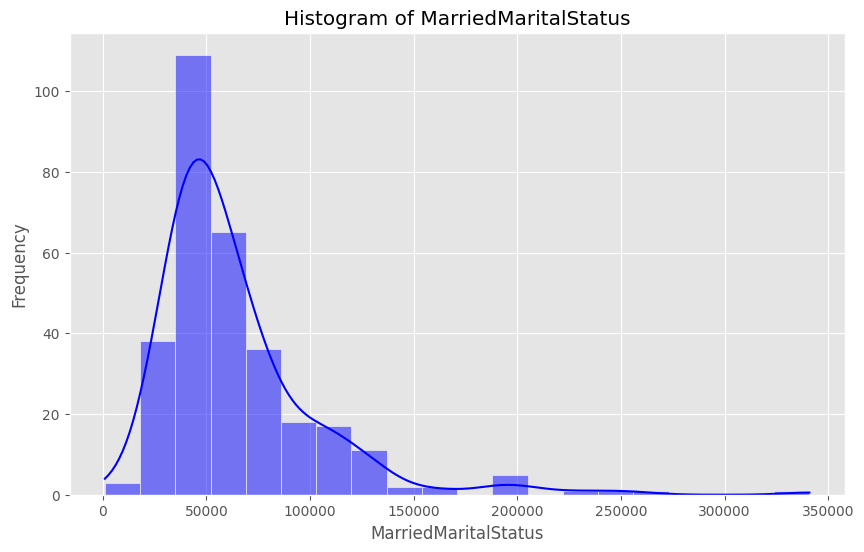

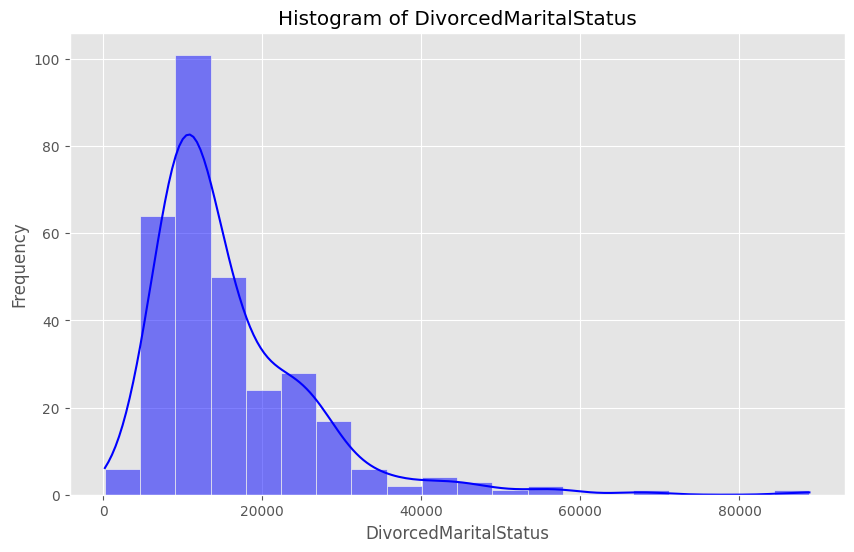

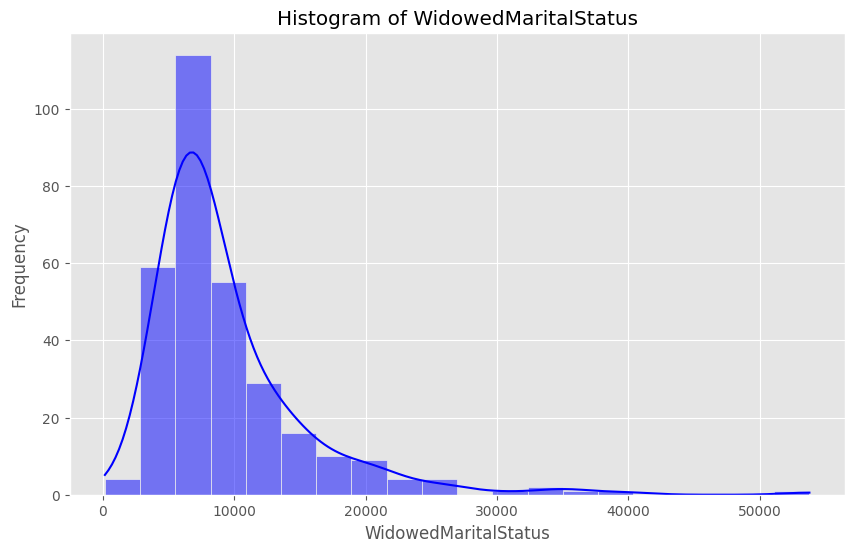

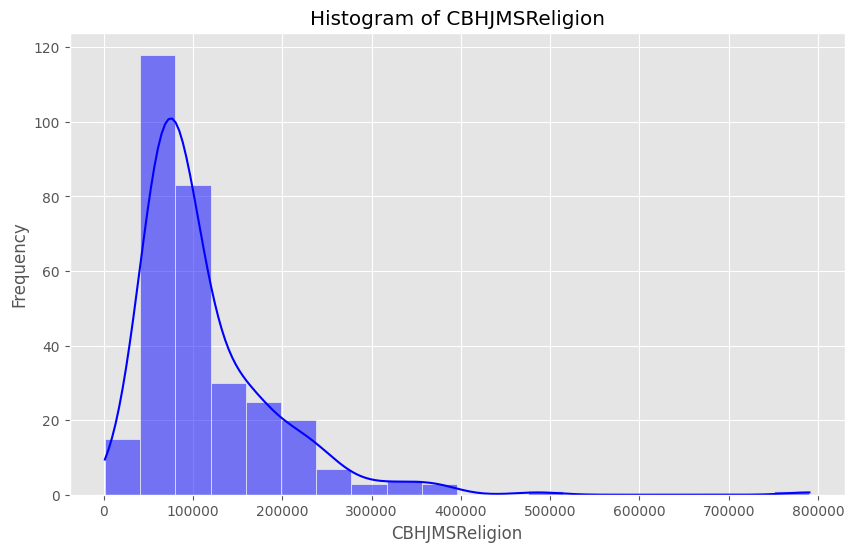

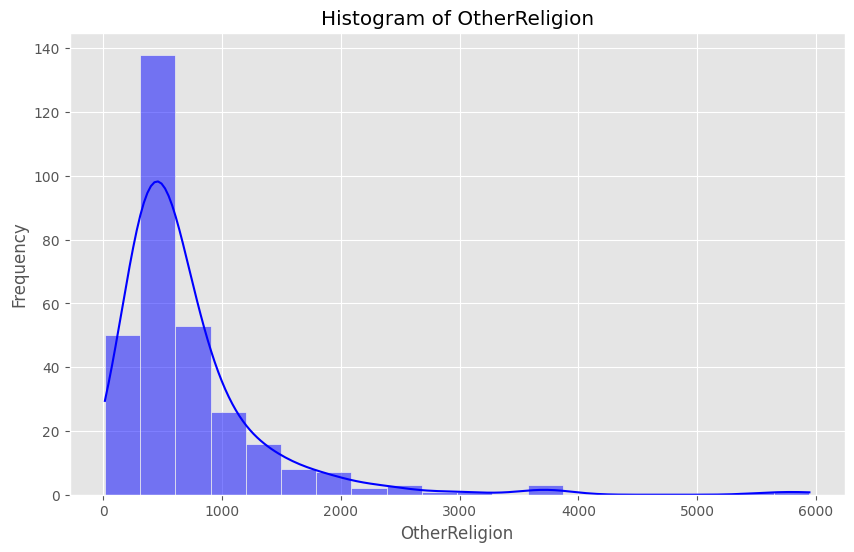

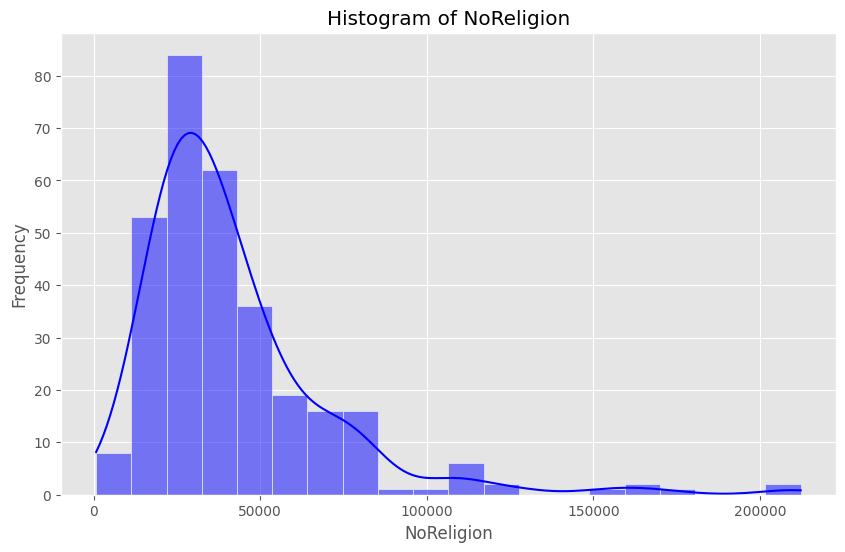

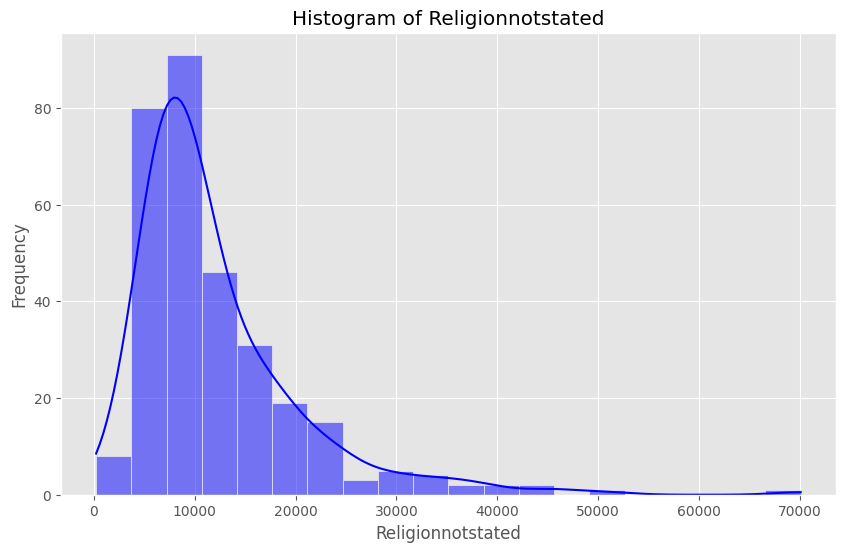

In [21]:
# Other histograms
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(final_df[var], bins=20, color='blue', kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

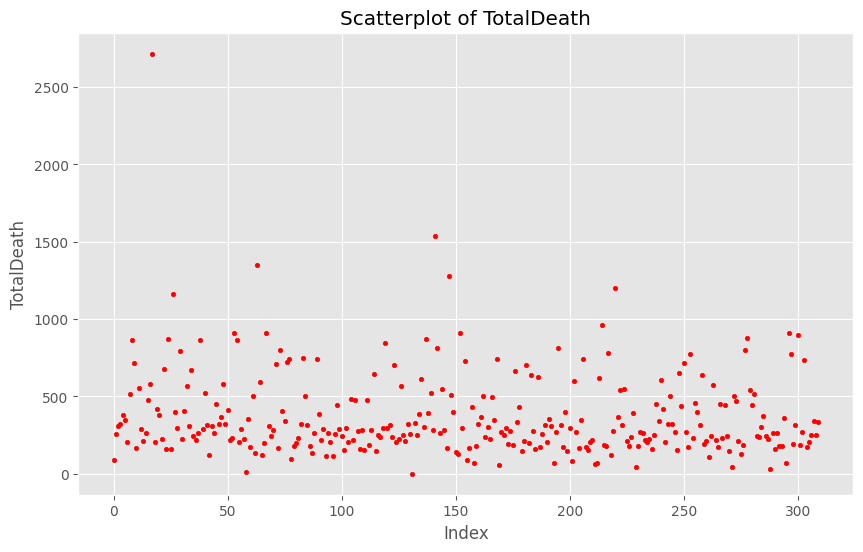

In [22]:
# Scatterplot of TotalDeath
plt.figure(figsize=(10, 6))
plt.scatter(range(len(final_df)), final_df['TotalDeath'], color='red', s=10)
plt.title('Scatterplot of TotalDeath')
plt.xlabel('Index')
plt.ylabel('TotalDeath')
plt.show()

In [23]:
# Correlation analysis
# Spearman correlation
spearman_corr = final_df[['TotalDeath', 'TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion']].corr(method='spearman')
print("\nSpearman Correlation:")
print(spearman_corr)


Spearman Correlation:
                    TotalDeath  TotalAge  TotalHealth  TotalMaritalStatus  \
TotalDeath            1.000000  0.848530     0.848530            0.844372   
TotalAge              0.848530  1.000000     1.000000            0.998846   
TotalHealth           0.848530  1.000000     1.000000            0.998846   
TotalMaritalStatus    0.844372  0.998846     0.998846            1.000000   
TotalReligion         0.848530  1.000000     1.000000            0.998846   

                    TotalReligion  
TotalDeath               0.848530  
TotalAge                 1.000000  
TotalHealth              1.000000  
TotalMaritalStatus       0.998846  
TotalReligion            1.000000  


In [24]:
# Pearson correlation
pearson_corr = final_df[['TotalDeath', 'TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion']].corr(method='pearson')
print("\nPearson Correlation:")
print(pearson_corr)



Pearson Correlation:
                    TotalDeath  TotalAge  TotalHealth  TotalMaritalStatus  \
TotalDeath            1.000000  0.906589     0.906589            0.899572   
TotalAge              0.906589  1.000000     1.000000            0.999048   
TotalHealth           0.906589  1.000000     1.000000            0.999048   
TotalMaritalStatus    0.899572  0.999048     0.999048            1.000000   
TotalReligion         0.906589  1.000000     1.000000            0.999048   

                    TotalReligion  
TotalDeath               0.906589  
TotalAge                 1.000000  
TotalHealth              1.000000  
TotalMaritalStatus       0.999048  
TotalReligion            1.000000  


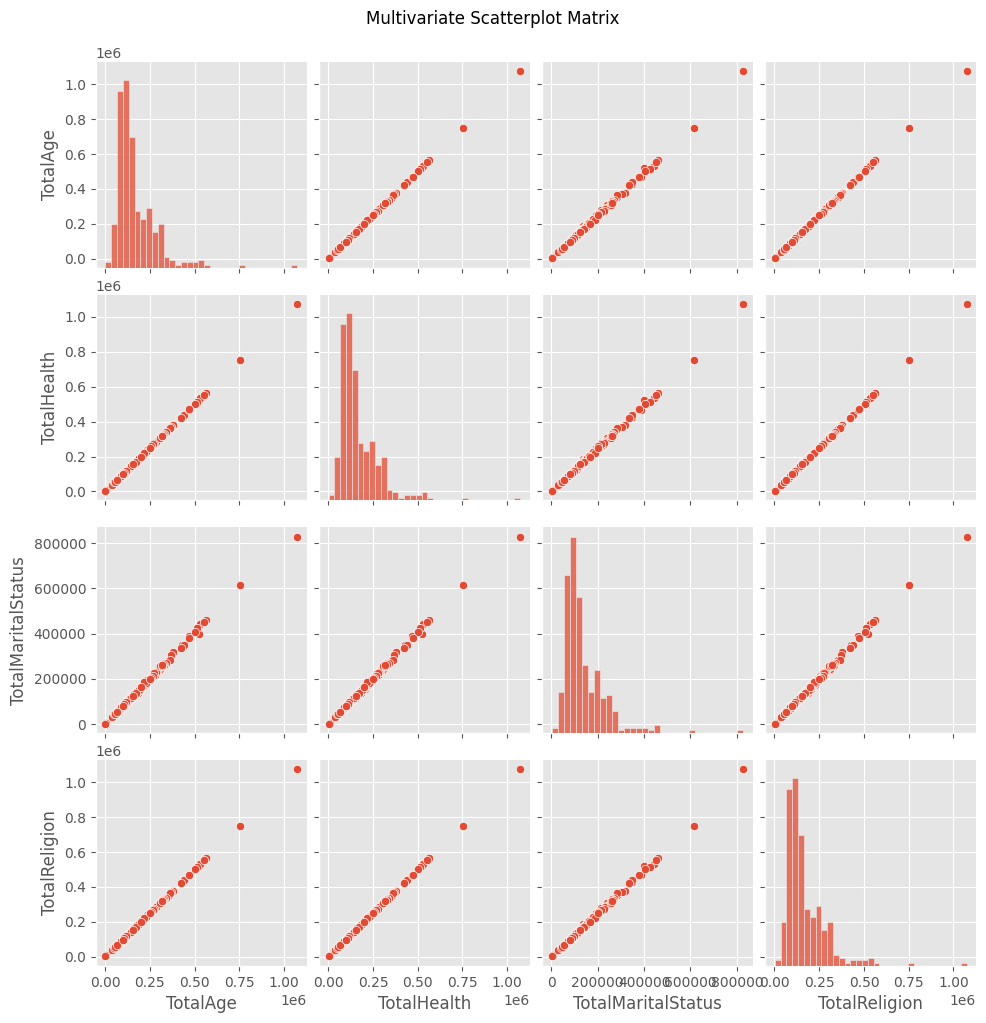

In [25]:
# Pairplot
sns.pairplot(final_df[['TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion']])
plt.suptitle('Multivariate Scatterplot Matrix', y=1.02)
plt.show()

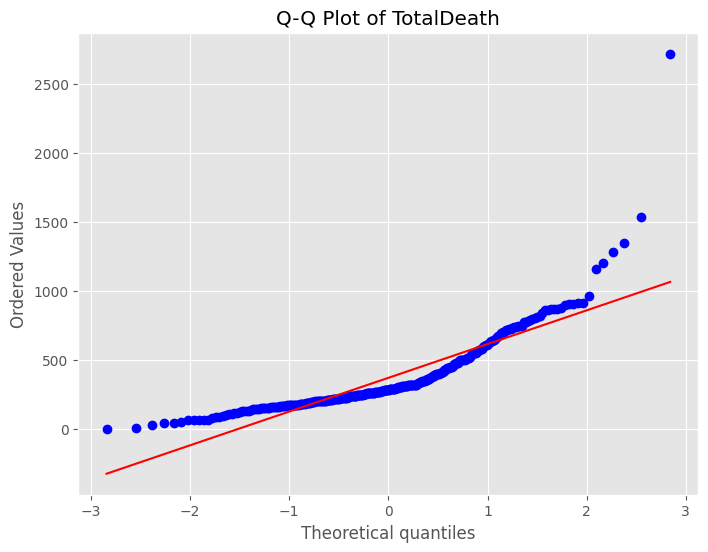

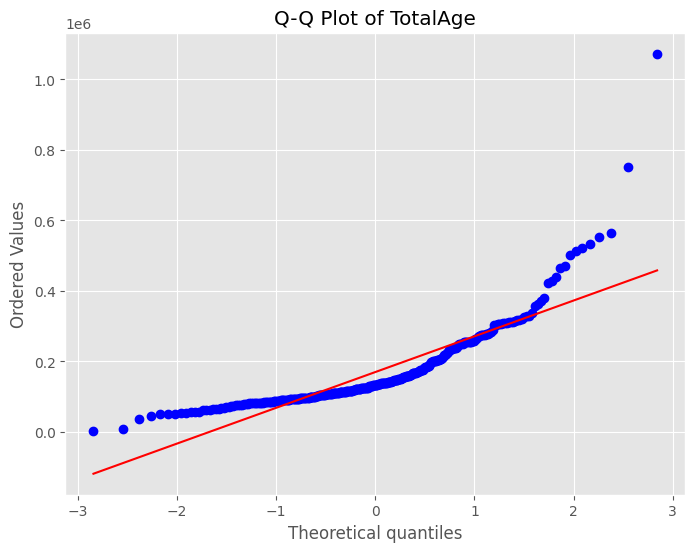

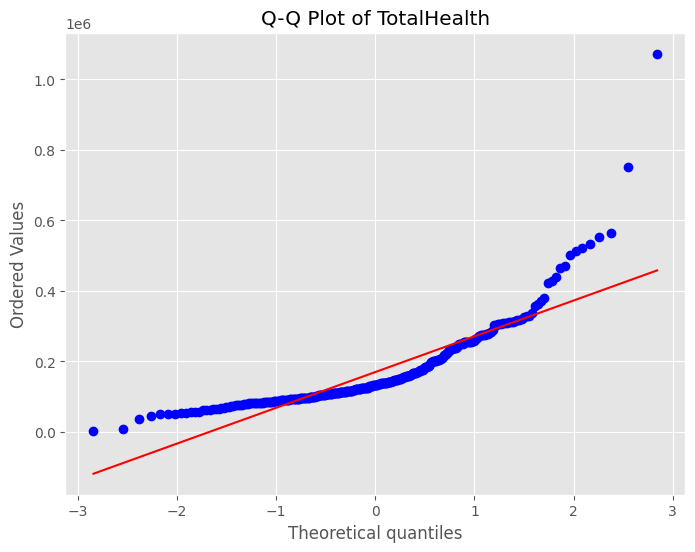

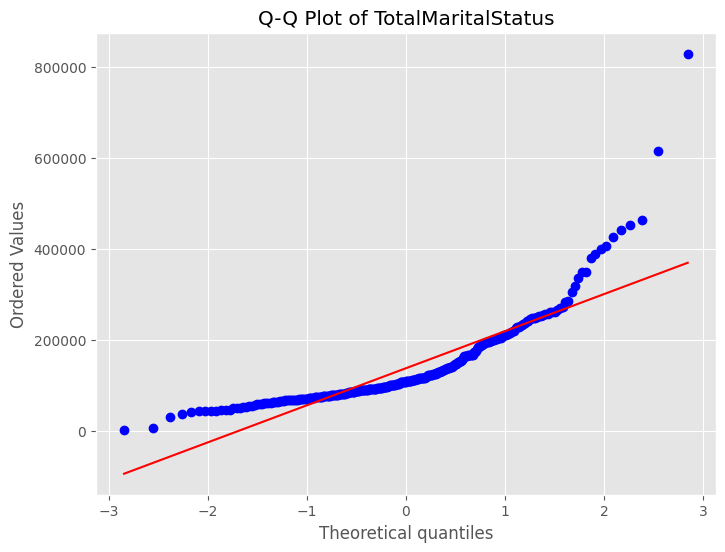

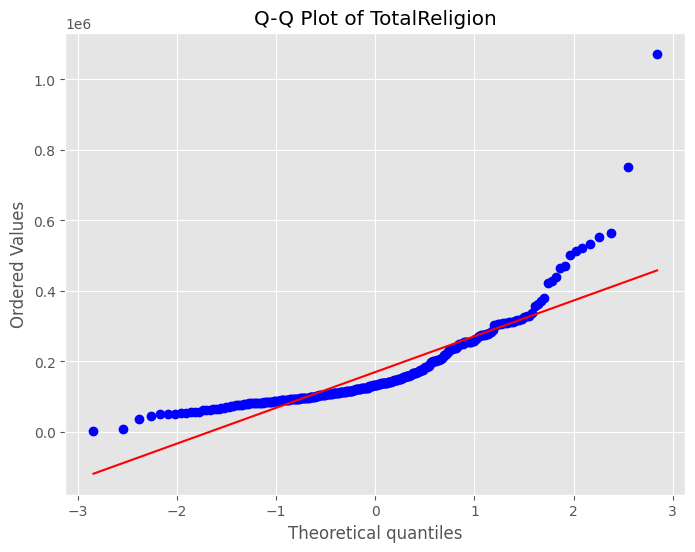

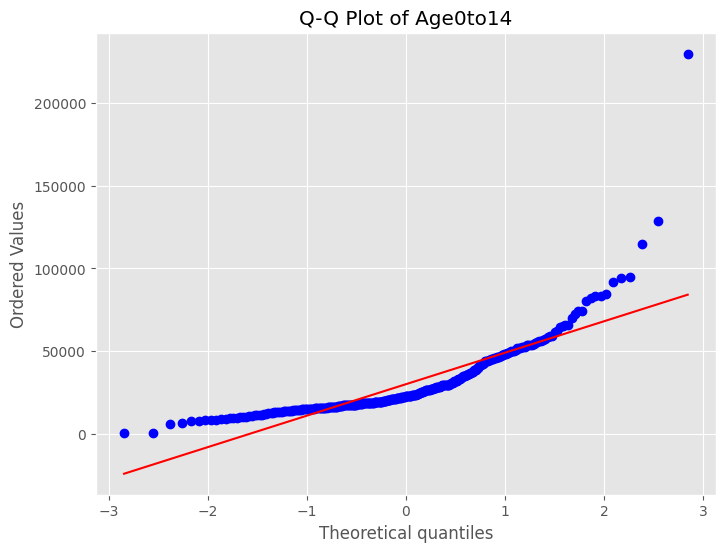

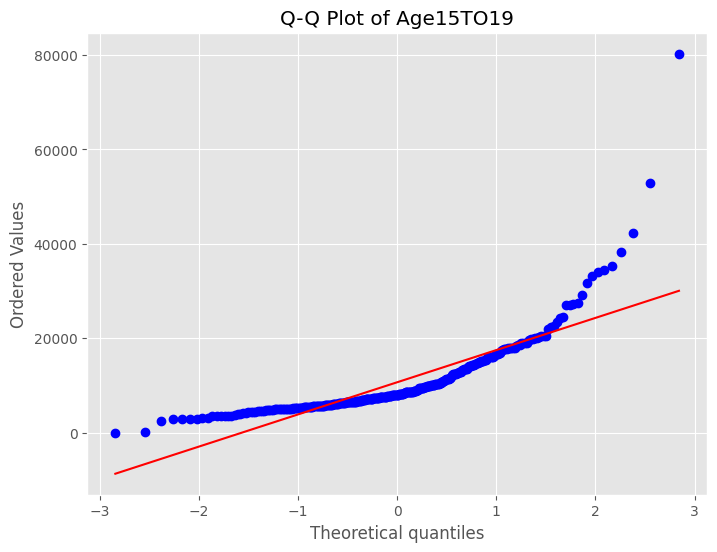

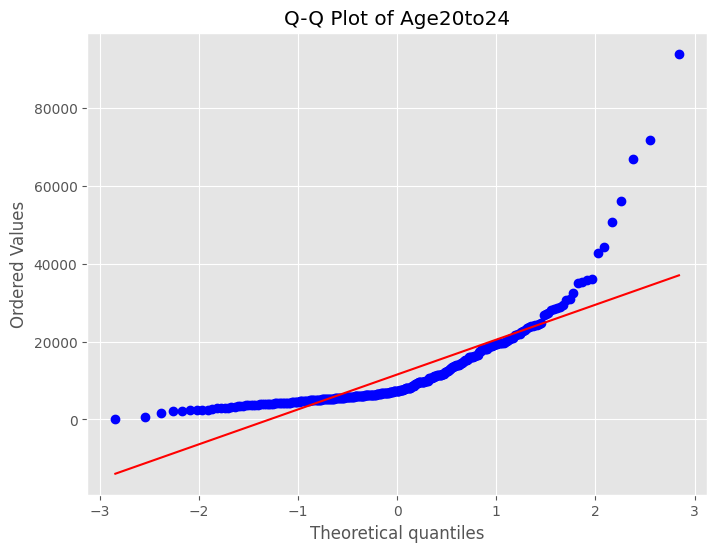

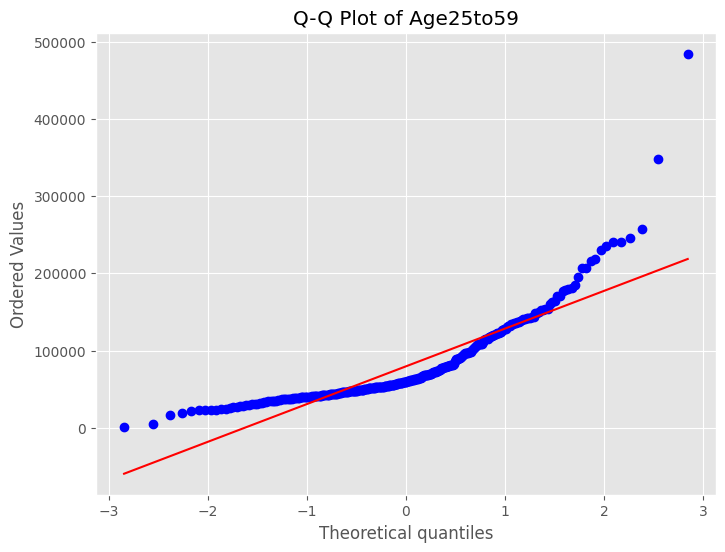

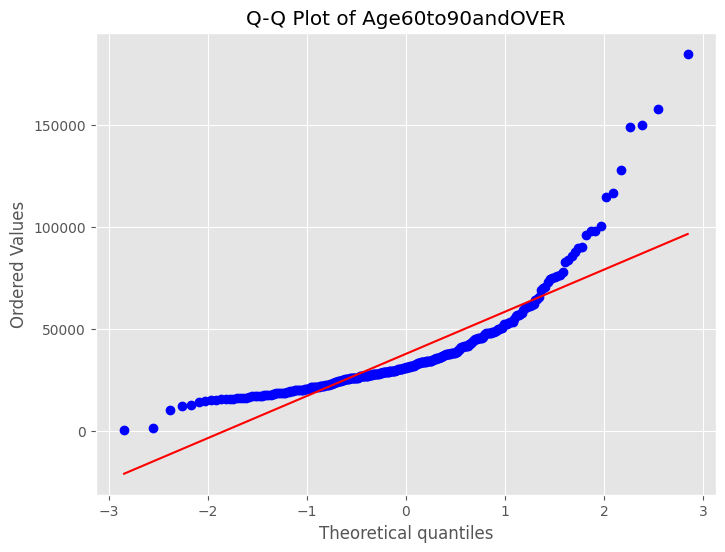

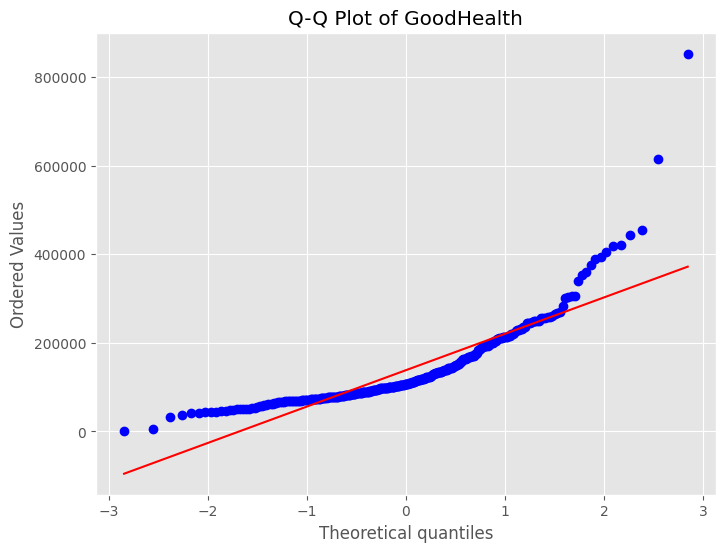

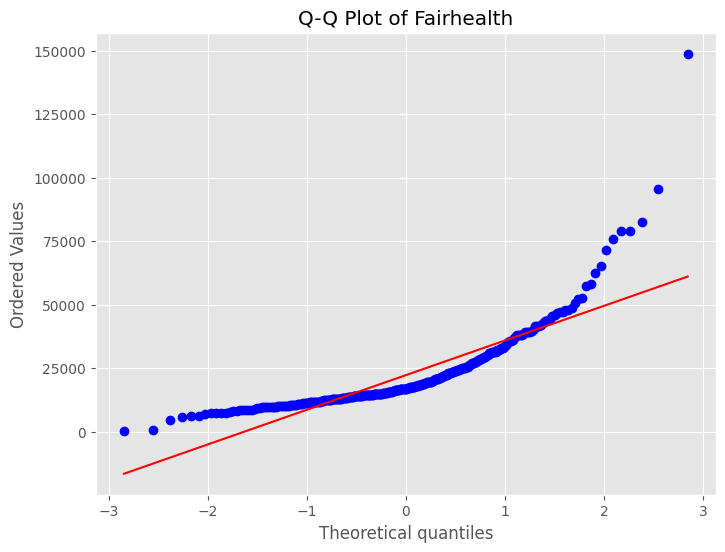

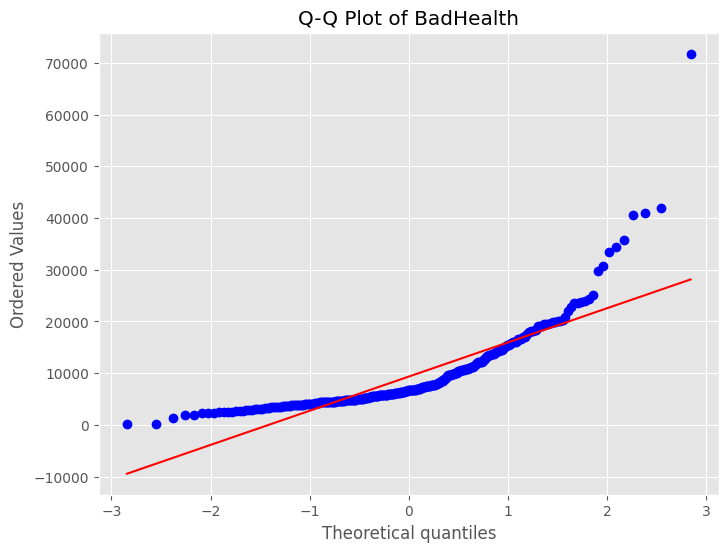

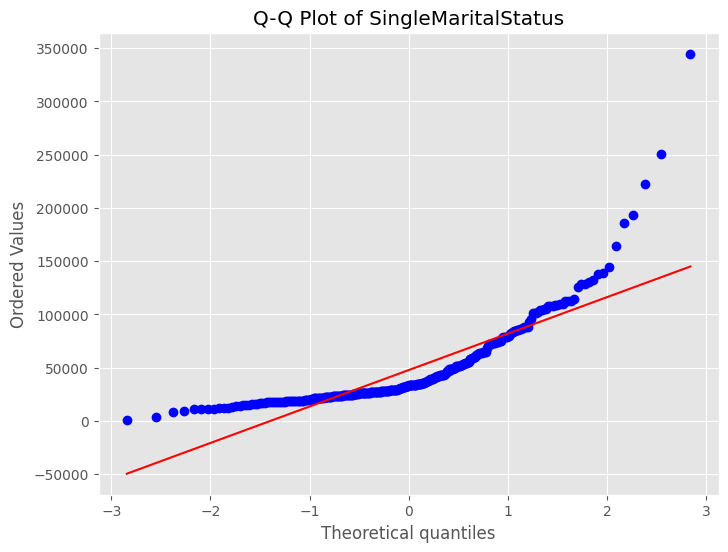

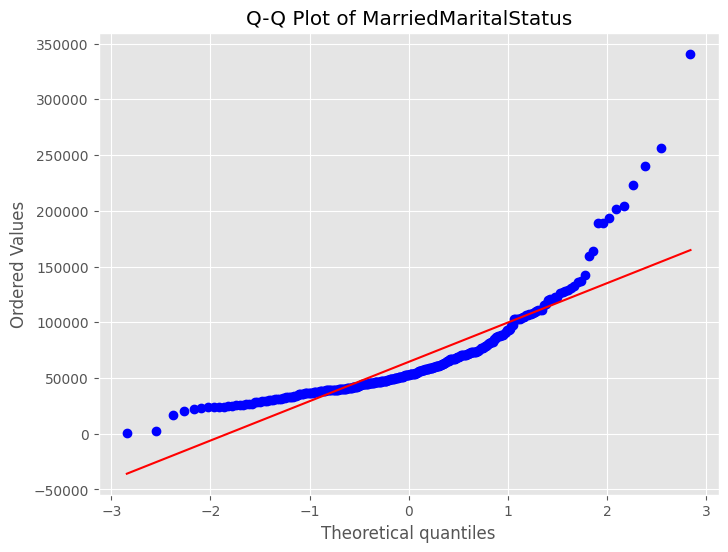

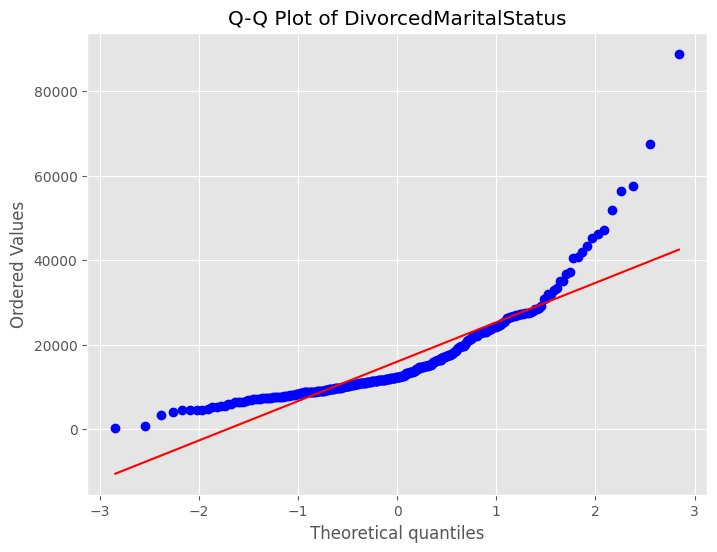

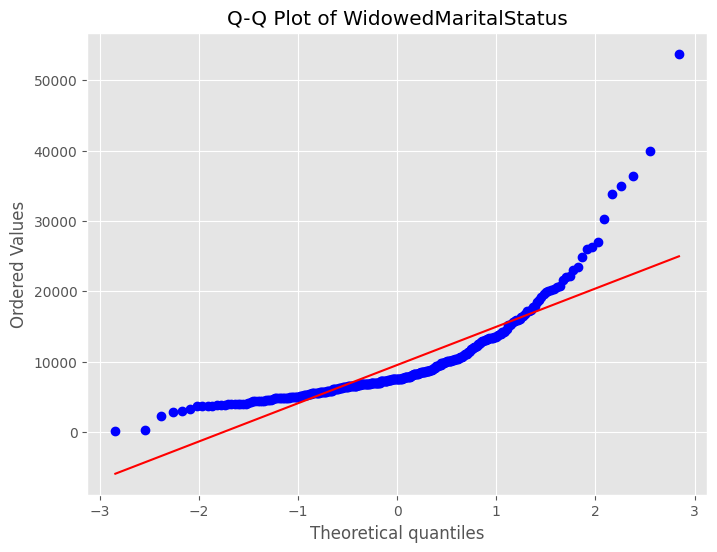

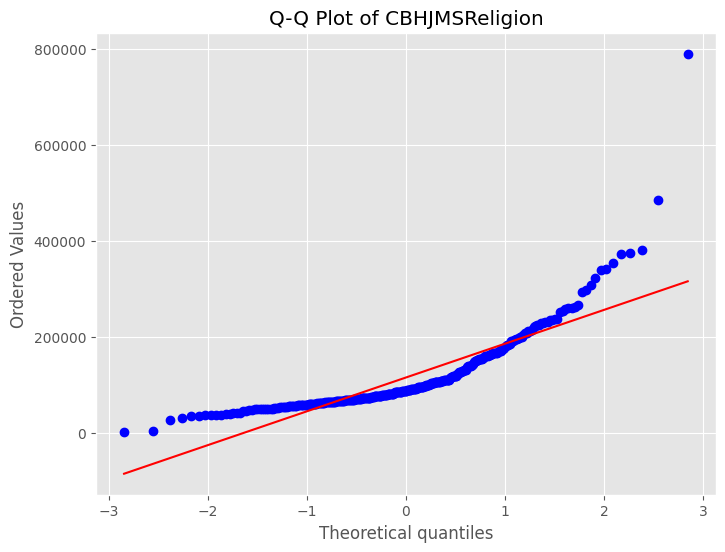

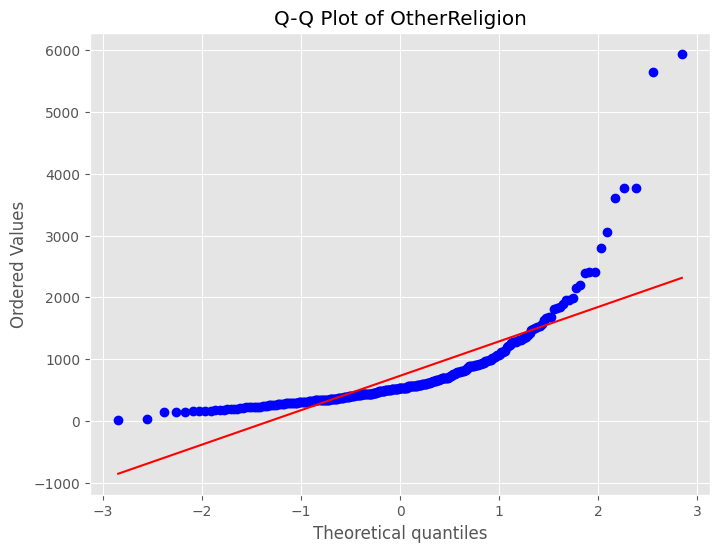

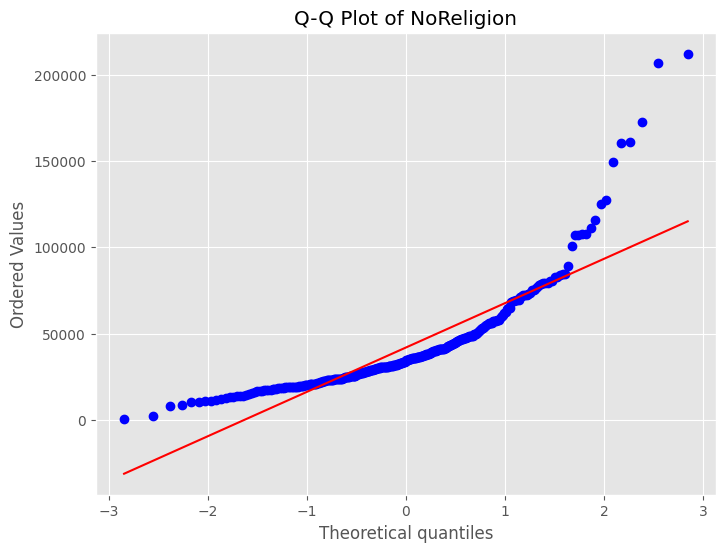

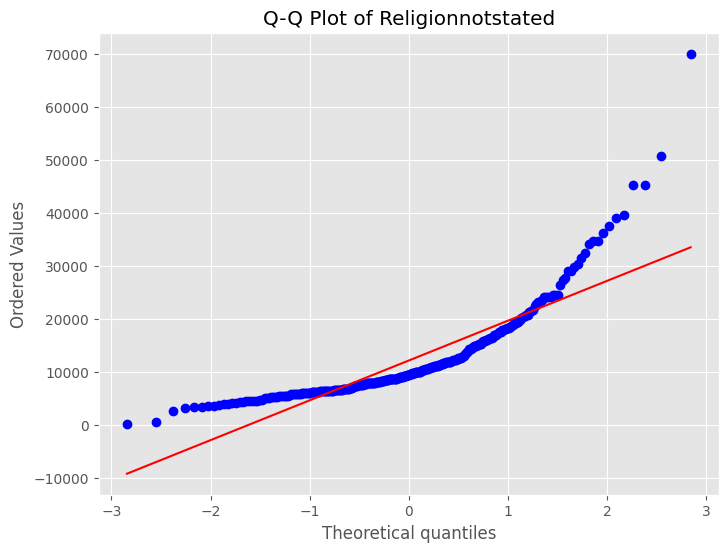

In [26]:
# Q-Q Plots
for var in variables:
    plt.figure(figsize=(8, 6))
    stats.probplot(final_df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

In [27]:
# Normality tests
# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(final_df['TotalDeath'], 'norm',
                             args=(final_df['TotalDeath'].mean(), final_df['TotalDeath'].std()))
print(f"\nKolmogorov-Smirnov Test for TotalDeath: statistic={ks_stat}, p-value={ks_p}")


Kolmogorov-Smirnov Test for TotalDeath: statistic=0.1848626785233044, p-value=9.564344115837241e-10


In [28]:
# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(final_df['TotalDeath'])
print(f"Shapiro-Wilk Test for TotalDeath: statistic={shapiro_stat}, p-value={shapiro_p}")

Shapiro-Wilk Test for TotalDeath: statistic=0.7731789924565942, p-value=2.0474385668017332e-20


In [29]:
# Data transformation examples
final_df['TotalDeath_log'] = np.log1p(final_df['TotalDeath'])
scaler = MinMaxScaler()
final_df['TotalDeath_minmax'] = scaler.fit_transform(final_df[['TotalDeath']])

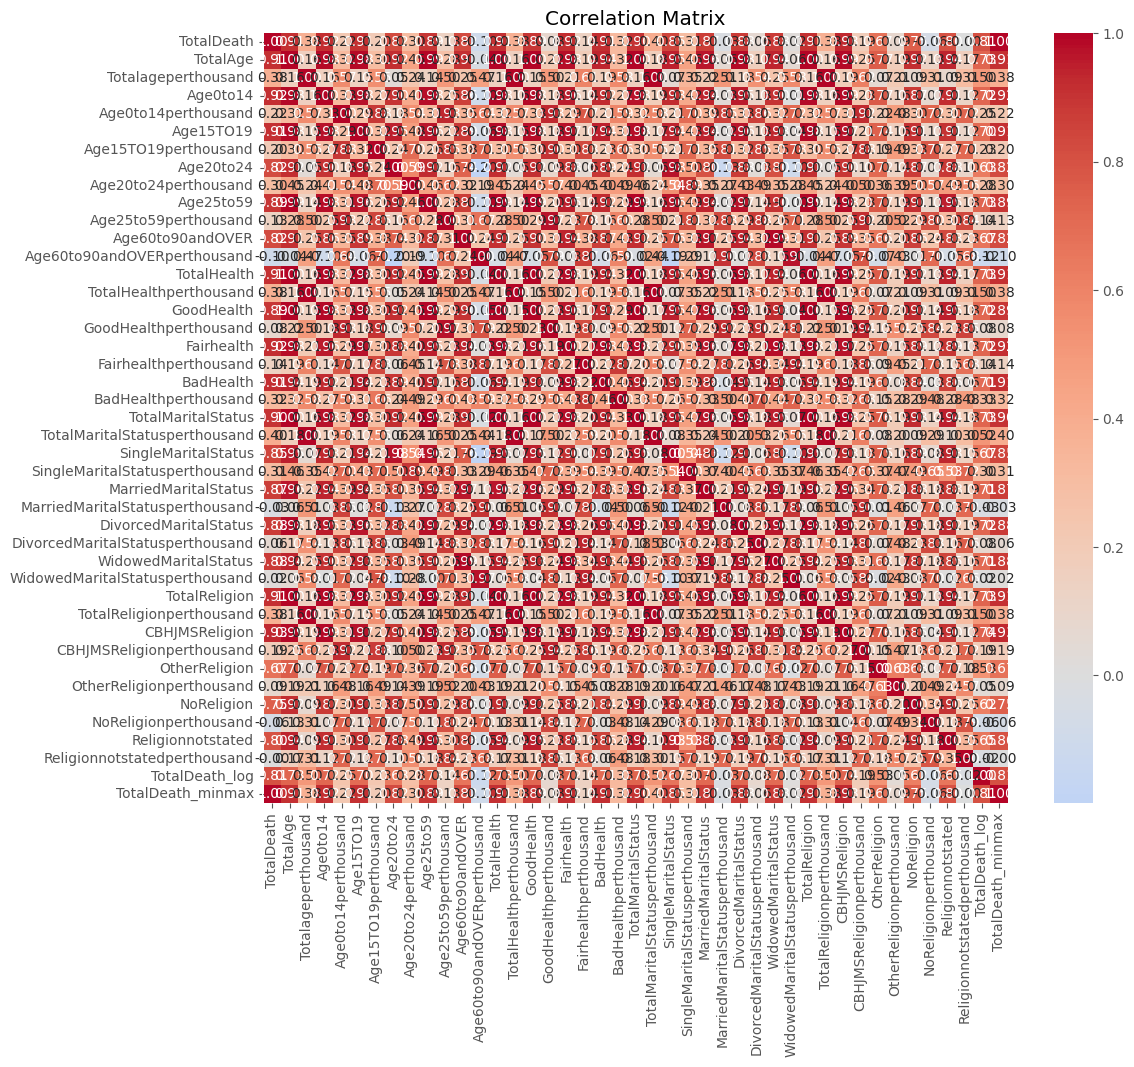

In [31]:
# Correlation matrix visualization
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_df = final_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Factor Analysis
# Select only numeric columns for factor analysis
numeric_cols = final_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = final_df[numeric_cols]

In [33]:
# KMO test
kmo_all, kmo_model = calculate_kmo(numeric_df)
print(f"\nKMO Test: Overall KMO = {kmo_model}")


KMO Test: Overall KMO = 0.0017405820990690853


In [34]:
# Eigenvalues and scree plot
fa = FactorAnalyzer(rotation=None)
fa.fit(numeric_df)


FactorAnalyzer(rotation=None, rotation_kwargs={})

In [35]:
# Get eigenvalues
ev, v = fa.get_eigenvalues()
print("\nEigenvalues:")
print(ev)


Eigenvalues:
[ 2.27990068e+01  1.14982917e+01  3.30374882e+00  1.59506232e+00
  1.08715617e+00  7.93138228e-01  5.00563606e-01  3.83955049e-01
  2.90775334e-01  2.30645925e-01  1.18625036e-01  9.46102576e-02
  8.32476736e-02  4.58964115e-02  3.94959236e-02  2.98480120e-02
  2.59248338e-02  2.22436385e-02  1.71588188e-02  1.08981415e-02
  8.89262245e-03  8.40139058e-03  5.54685652e-03  2.33538471e-03
  1.74673838e-03  1.14869776e-03  8.70814527e-04  3.77043384e-04
  2.02159670e-04  1.83874177e-04  1.74843357e-06  1.20076739e-09
  7.28552198e-10  4.46398409e-10  1.90845772e-15  1.08599018e-15
  6.36701504e-16 -2.11752972e-16 -8.08893681e-16 -1.00698687e-15
 -1.24304235e-15 -1.89365622e-15 -2.35373922e-15]


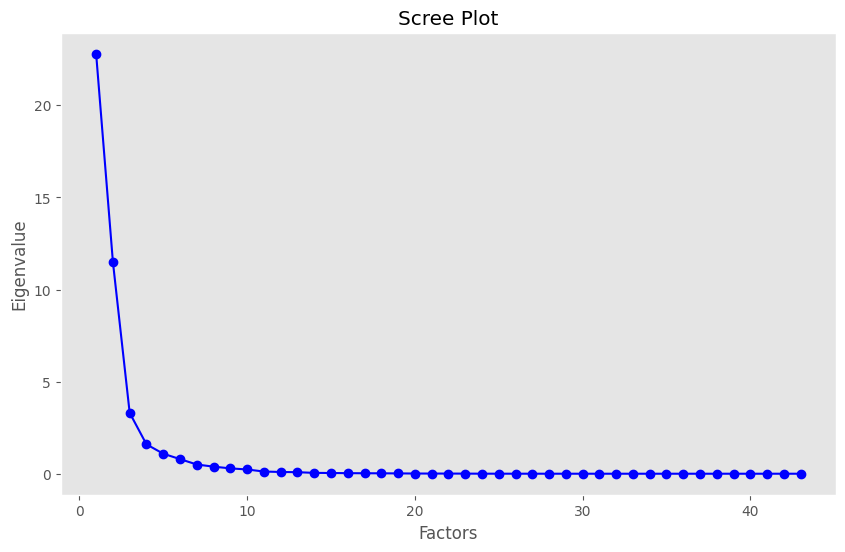

In [36]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, numeric_df.shape[1]+1), ev, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

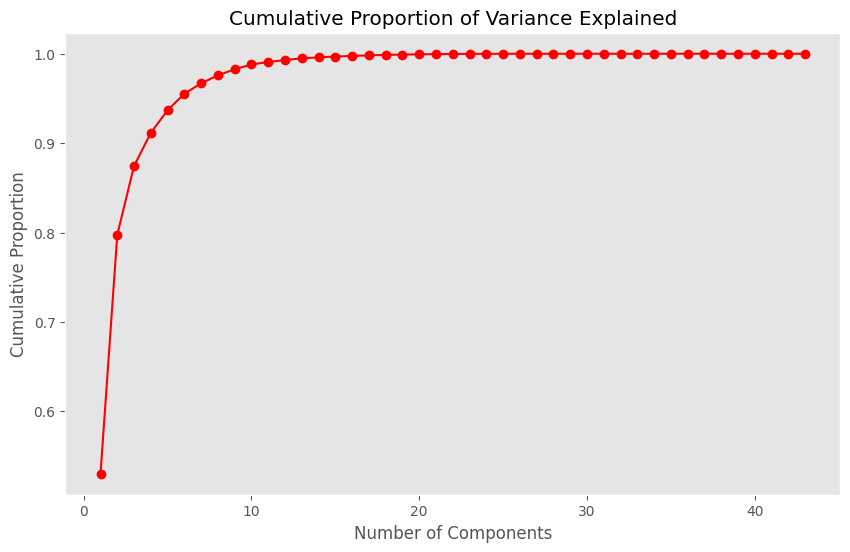

In [37]:
# Cumulative proportion plot
cumulative_prop = np.cumsum(ev) / np.sum(ev)
plt.figure(figsize=(10, 6))
plt.plot(range(1, numeric_df.shape[1]+1), cumulative_prop, 'ro-')
plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion')
plt.grid()
plt.show()

In [38]:
# Hierarchical Clustering
# Select relevant columns for clustering
cluster_cols = ['TotalAge', 'TotalHealth', 'TotalMaritalStatus', 'TotalReligion']
cluster_df = final_df[cluster_cols]


In [39]:
# Normalize the data
cluster_df = (cluster_df - cluster_df.mean()) / cluster_df.std()

In [40]:
# Perform hierarchical clustering
Z = linkage(cluster_df, method='ward', metric='euclidean')

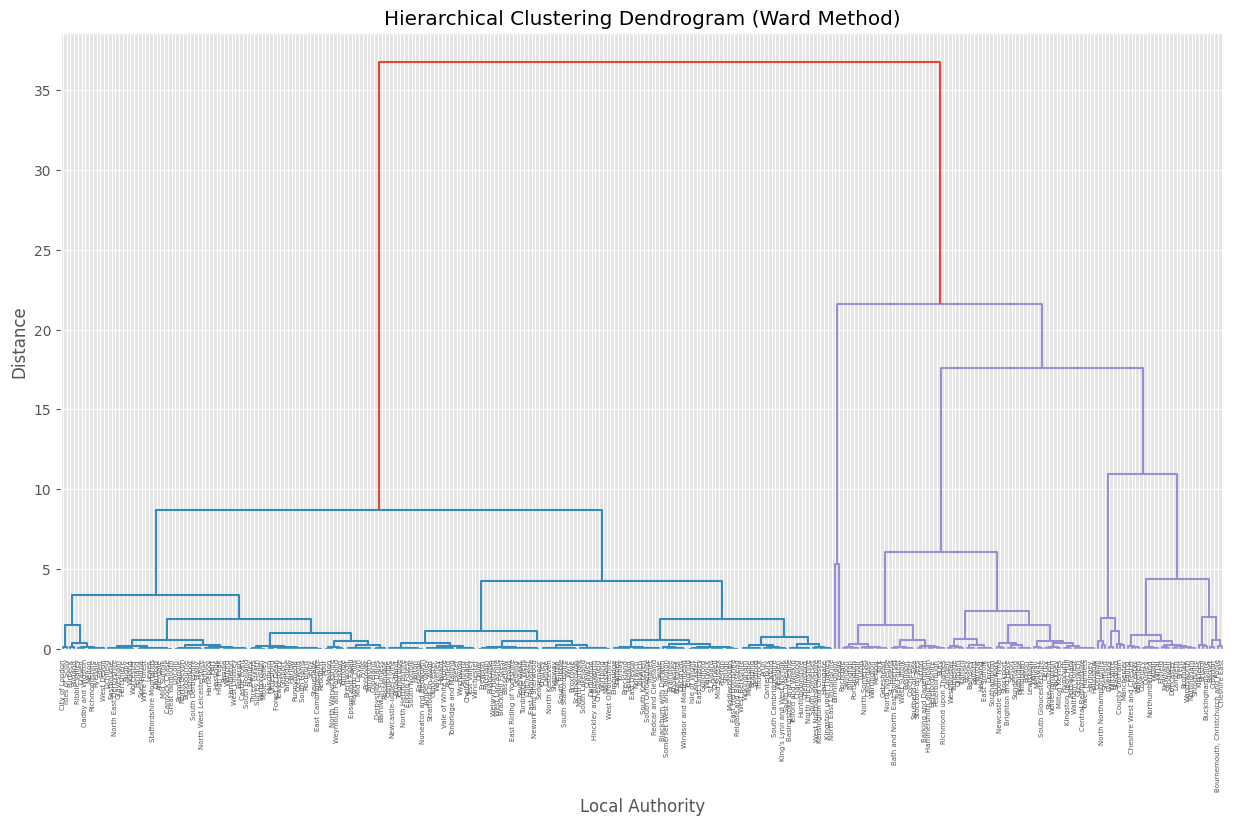

In [41]:
# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=final_df['LA_name'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Local Authority')
plt.ylabel('Distance')
plt.show()

In [43]:
# Cut the dendrogram to get 4 clusters
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
final_df['Cluster'] = cluster.fit_predict(cluster_df)

In [44]:
# Create output dataframe with cluster assignments
output_df = final_df[['LA_code', 'LA_name', 'Cluster']].copy()
print("\nCluster assignments:")
print(output_df)


Cluster assignments:
       LA_code       LA_name  Cluster
0    E07000223          Adur        1
1    E07000026     Allerdale        1
2    E07000032  Amber Valley        1
3    E07000224          Arun        1
4    E07000170      Ashfield        1
..         ...           ...      ...
305  E07000229      Worthing        1
306  E07000238      Wychavon        1
307  E07000128          Wyre        1
308  E07000239   Wyre Forest        1
309  E06000014          York        3

[310 rows x 3 columns]


In [45]:
# Save cluster assignments to CSV
output_df.to_csv('/content/drive/MyDrive/cluster_assignments.csv', index=False)  # Update path as needed

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive'

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
